In [5]:
%matplotlib inline


# RBF SVM parameters

## This example is adapted from [Sklearn RBF Parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

Automatically created module for IPython interactive environment


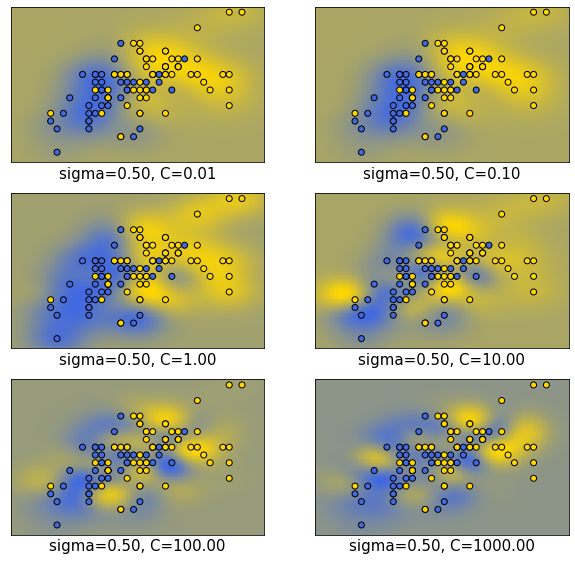

In [29]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

C_2d_range = [0.01,0.1, 1, 10, 100, 1000]
gamma_2d_range = [1./(2*(i**2)) for i in [0.5]]
classifiers = []
for C in C_2d_range:
    for gamma in [1./(2*(i**2)) for i in [0.5]]:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

color = np.where(y_2d==0, 'royalblue', 'gold')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['gold', 'royalblue'])
plt.figure(figsize=(10, 20))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range)+1, k+1)
    # plt.title("sigma=%.2f, C=1" % (1./(2*gamma)**(1/2)),
    #           size='medium')
    plt.xlabel("sigma=%.2f, C=%.2f" % (1./(2*gamma)**(1/2), C), fontsize=15)
    # plt.title("sigma=%d, C=1" % (gamma),
    #           size='medium')
    # print(gamma)
    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=cmap,shading='auto')
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=color, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')